## FIT A MODEL


In [16]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv(r'G:\GlitchDetect\supervised_learning_non_seq\generated_data\2000_flow_1hr_25_11hr_50_with_faults.csv')

In [18]:
X = data.drop(columns=['fault_label'])
y = data['fault_label']  

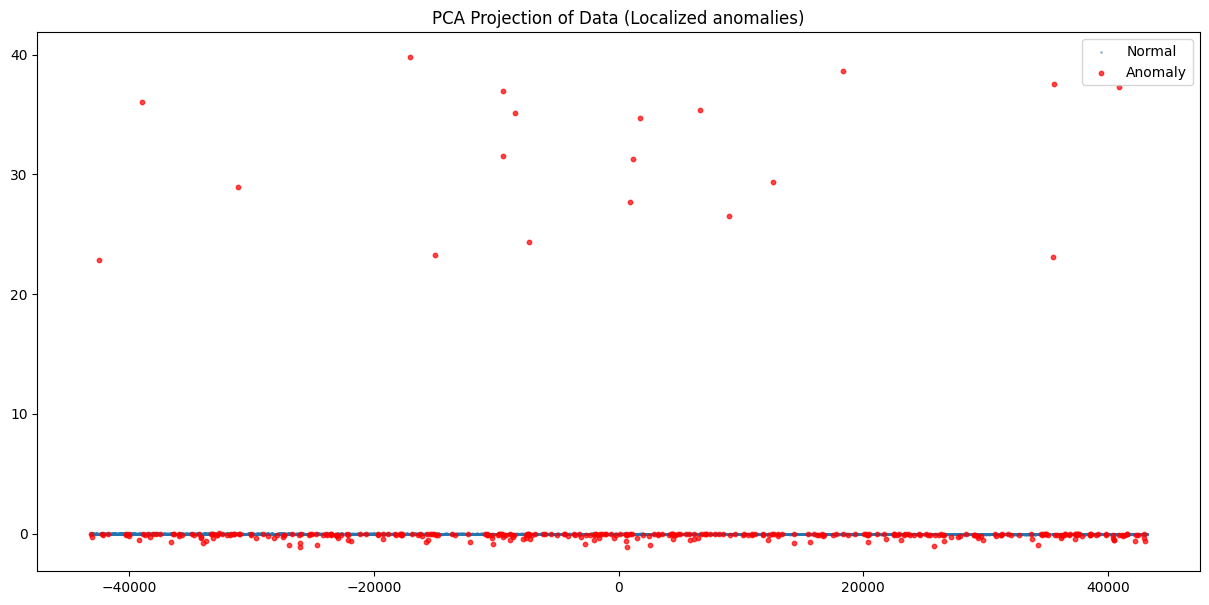

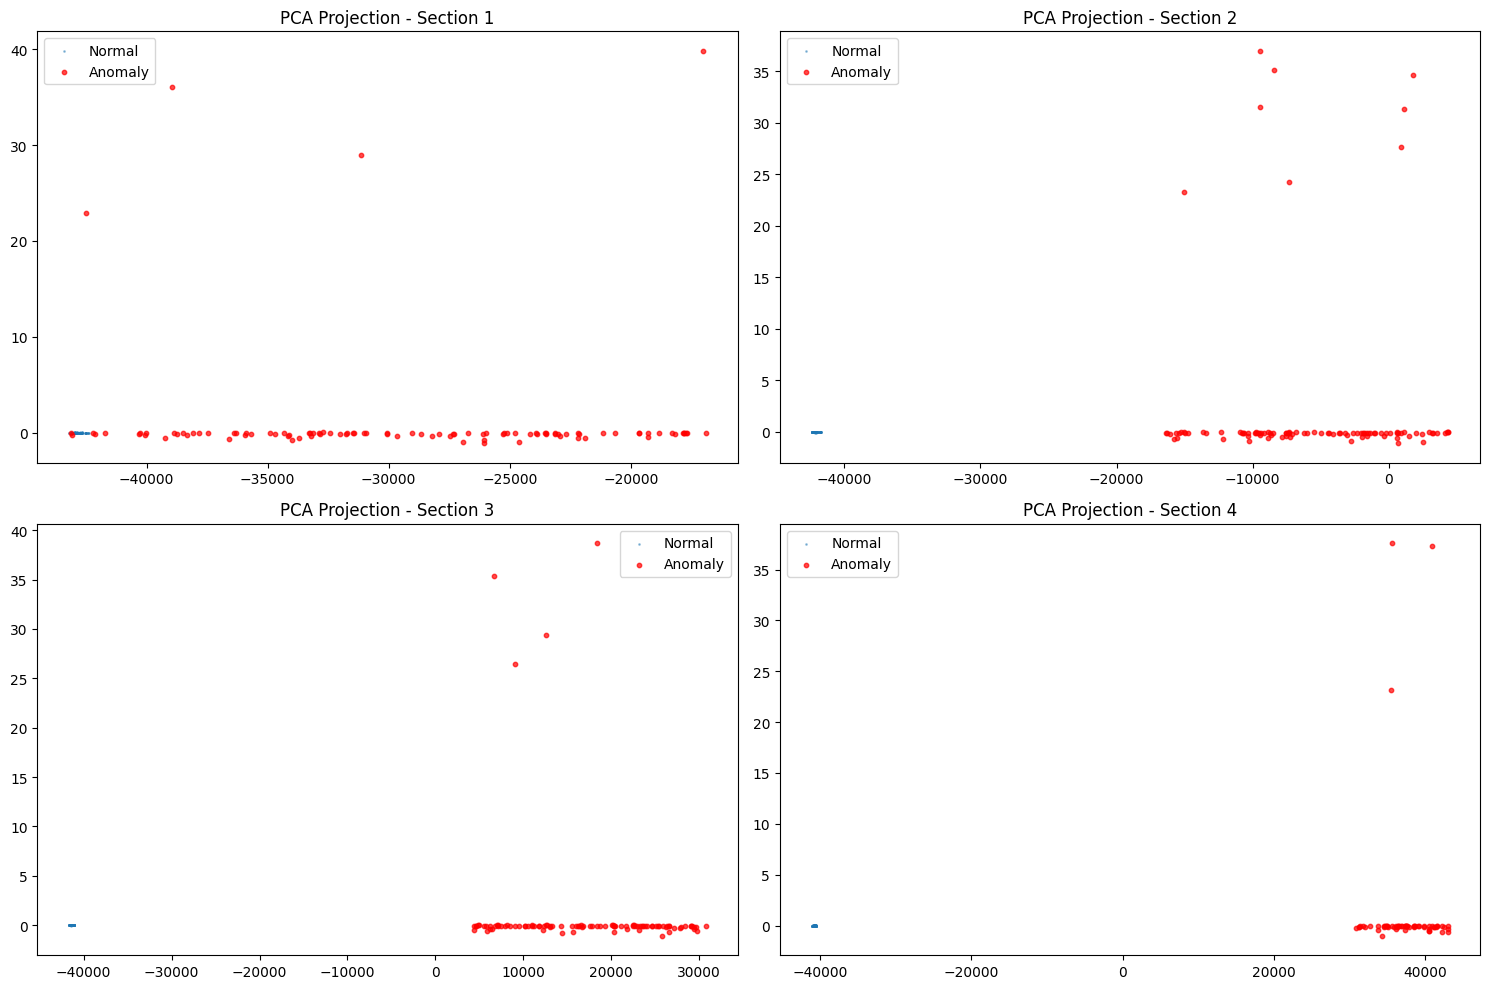

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(15,7))
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], alpha=0.4, s=1, label="Normal")
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], alpha=0.7, s=10, label="Anomaly", c="red")
plt.title("PCA Projection of Data (Localized anomalies)")
plt.legend()
plt.show()

# Zoomed in into different sections subplots each having quarters of data
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].scatter(X_pca[y==0, 0][:100], X_pca[y==0, 1][:100], alpha=0.4, s=1, label="Normal")
axs[0, 0].scatter(X_pca[y==1, 0][:100], X_pca[y==1, 1][:100], alpha=0.7, s=10, label="Anomaly", c="red")
axs[0, 0].set_title("PCA Projection - Section 1")
axs[0, 0].legend()

axs[0, 1].scatter(X_pca[y==0, 0][100:200], X_pca[y==0, 1][100:200], alpha=0.4, s=1, label="Normal")
axs[0, 1].scatter(X_pca[y==1, 0][100:200], X_pca[y==1, 1][100:200], alpha=0.7, s=10, label="Anomaly", c="red")
axs[0, 1].set_title("PCA Projection - Section 2")
axs[0, 1].legend()

axs[1, 0].scatter(X_pca[y==0, 0][200:300], X_pca[y==0, 1][200:300], alpha=0.4, s=1, label="Normal")
axs[1, 0].scatter(X_pca[y==1, 0][200:300], X_pca[y==1, 1][200:300], alpha=0.7, s=10, label="Anomaly", c="red")
axs[1, 0].set_title("PCA Projection - Section 3")
axs[1, 0].legend()

axs[1, 1].scatter(X_pca[y==0, 0][300:400], X_pca[y==0, 1][300:400], alpha=0.4, s=1, label="Normal")
axs[1, 1].scatter(X_pca[y==1, 0][300:400], X_pca[y==1, 1][300:400], alpha=0.7, s=10, label="Anomaly", c="red")
axs[1, 1].set_title("PCA Projection - Section 4")
axs[1, 1].legend()

plt.tight_layout()
plt.show()


c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


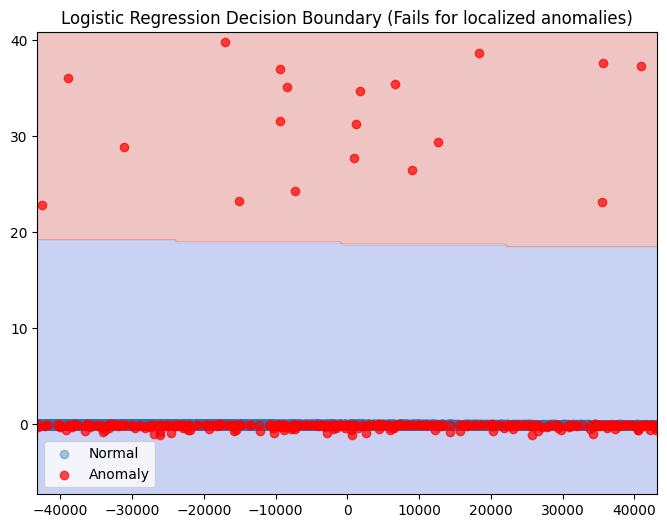

In [20]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Train Logistic Regression on PCA-reduced data
clf = LogisticRegression()
clf.fit(X_pca, y)

# Create a meshgrid for decision boundary
xx, yy = np.meshgrid(np.linspace(X_pca[:,0].min()-1, X_pca[:,0].max()+1, 200),
                     np.linspace(X_pca[:,1].min()-1, X_pca[:,1].max()+1, 200))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], alpha=0.4, label="Normal")
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], alpha=0.7, label="Anomaly", c="red")
plt.title("Logistic Regression Decision Boundary (Fails for localized anomalies)")
plt.legend()
plt.show()


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

In [23]:
model.fit(X_train, y_train)

c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'multinomial'


In [24]:
y_pred = model.predict(X_test)


In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.72

Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      1.00      0.84      3697
         1.0       0.76      0.29      0.42       121
         2.0       0.08      0.00      0.00       546
         3.0       0.18      0.00      0.00       821

    accuracy                           0.72      5185
   macro avg       0.44      0.32      0.32      5185
weighted avg       0.57      0.72      0.61      5185



5185


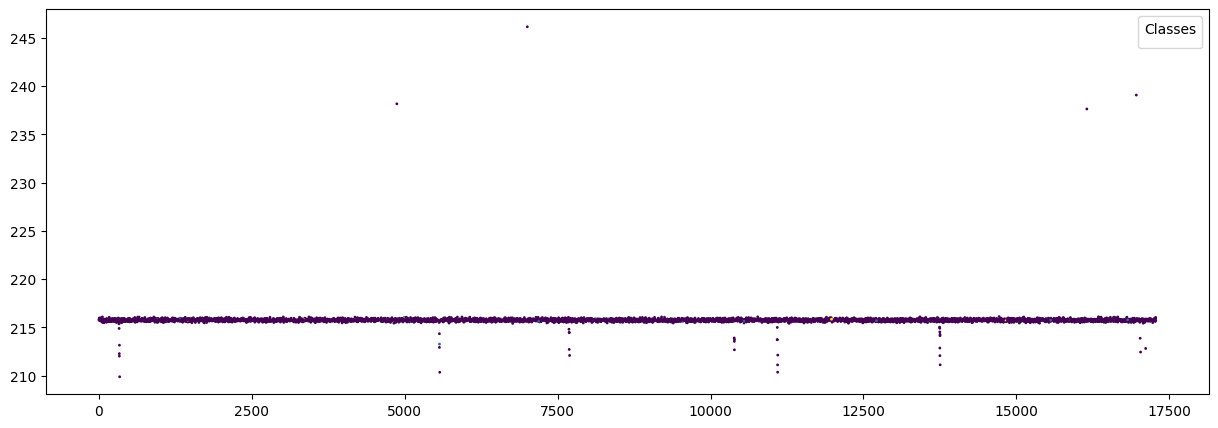

In [26]:
plt.figure(figsize=(15, 5))
plt.scatter(X_test.index, X_test['P1_PS_UP'], c=y_pred, cmap='viridis', s=1)

plt.legend(*plt.gca().get_legend_handles_labels(), title="Classes")
print(len(X_test))

In [ ]:
#test model on an different data in test.csv
#print model performance metrics this is a 8000 row one with 1255 low, and lower operating rates and all are 100 open
test_csv = r'G:\GlitchDetect\supervised_learning_non_seq\generated_data\generated_with_faults.csv'
test_data_diff_dataset = pd.read_csv(test_csv)

X_test_diff = test_data_diff_dataset.drop(columns=['fault_label']).values
y_test_diff = test_data_diff_dataset['fault_label'].values

y_pred_diff = model.predict(X_test_diff)

accuracy_diff = accuracy_score(y_test_diff, y_pred_diff)

print(f"Model accuracy on different dataset: {accuracy_diff}")

print("\nClassification Report:\n", classification_report(y_test_diff, y_pred_diff))

Model accuracy on different dataset: 0.019964122446617674

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     12470
         1.0       0.02      1.00      0.04       345
         2.0       0.00      0.00      0.00      1738
         3.0       0.00      0.00      0.00      2728

    accuracy                           0.02     17281
   macro avg       0.00      0.25      0.01     17281
weighted avg       0.00      0.02      0.00     17281



c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetric

## USING SVM models

In [28]:
#import svm models to train data on svm
from sklearn import svm

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Normal batch SVM (not online)
svm = SVC(
    kernel="linear",   # you can try "rbf" or "poly"
    C=0.1,             # regularization strength
    max_iter=10000     # safety cap so it doesn't run forever
)

# Train
svm.fit(X_train, y_train)

# Predict
y_pred = svm.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)    


Test Accuracy: 0.33095467695274833


c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [30]:
# testing on diff_dataset

X_test_diff = test_data_diff_dataset.drop(columns=['fault_label']).values
y_test_diff = test_data_diff_dataset['fault_label'].values

y_pred_diff = model.predict(X_test_diff)

accuracy_diff = accuracy_score(y_test_diff, y_pred_diff)

print(f"Model accuracy on different dataset: {accuracy_diff}")

print("\nClassification Report:\n", classification_report(y_test_diff, y_pred_diff))

Model accuracy on different dataset: 0.019964122446617674

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     12470
         1.0       0.02      1.00      0.04       345
         2.0       0.00      0.00      0.00      1738
         3.0       0.00      0.00      0.00      2728

    accuracy                           0.02     17281
   macro avg       0.00      0.25      0.01     17281
weighted avg       0.00      0.02      0.00     17281



c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetric

## using Random forest classifier


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest
rf = RandomForestClassifier(
    n_estimators=200,   # number of trees
    max_depth=None,     # let trees expand fully (you can tune this)
    random_state=42,
    n_jobs=-1           # use all CPU cores
)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)


Test Accuracy: 0.8761812921890068


In [32]:
# testing of diff dataset
X_test_diff = test_data_diff_dataset.drop(columns=['fault_label']).values
y_test_diff = test_data_diff_dataset['fault_label'].values

y_pred_diff = rf.predict(X_test_diff)

accuracy_diff = accuracy_score(y_test_diff, y_pred_diff)

print(f"Model accuracy on different dataset: {accuracy_diff:.2f}")

print("\nClassification Report:\n", classification_report(y_test_diff, y_pred_diff))

Model accuracy on different dataset: 0.16

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     12470
         1.0       0.00      0.00      0.00       345
         2.0       0.00      0.00      0.00      1738
         3.0       0.16      1.00      0.27      2728

    accuracy                           0.16     17281
   macro avg       0.04      0.25      0.07     17281
weighted avg       0.02      0.16      0.04     17281



c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMe

In [33]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {acc:.4f}\n")
    
    # Classification Report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Logistic Regression Accuracy: 0.7306

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84      3697
         1.0       0.82      0.56      0.67       121
         2.0       0.00      0.00      0.00       546
         3.0       0.66      0.03      0.05       821

    accuracy                           0.73      5185
   macro avg       0.55      0.40      0.39      5185
weighted avg       0.64      0.73      0.63      5185

[[3697    0    0    0]
 [  35   68    7   11]
 [ 538    7    0    1]
 [ 790    8    0   23]]


c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


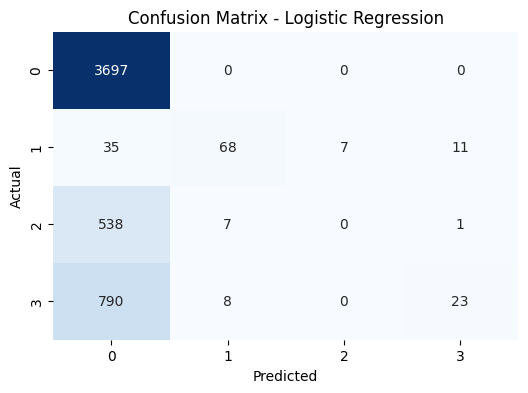

Random Forest Accuracy: 0.8762

Classification Report for Random Forest:

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      3697
         1.0       0.86      0.83      0.84       121
         2.0       0.29      0.01      0.01       546
         3.0       0.99      0.91      0.95       821

    accuracy                           0.88      5185
   macro avg       0.75      0.69      0.68      5185
weighted avg       0.82      0.88      0.83      5185

[[3689    0    3    5]
 [  15  100    6    0]
 [ 527   14    4    1]
 [  68    2    1  750]]


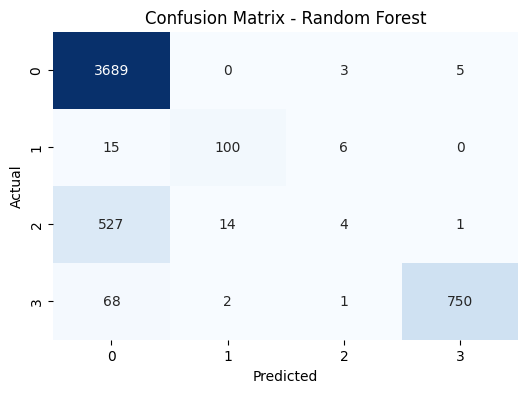

SVM Accuracy: 0.3310

Classification Report for SVM:

              precision    recall  f1-score   support

         0.0       0.72      0.38      0.50      3697
         1.0       0.04      0.11      0.06       121
         2.0       0.09      0.41      0.15       546
         3.0       0.15      0.09      0.11       821

    accuracy                           0.33      5185
   macro avg       0.25      0.25      0.20      5185
weighted avg       0.55      0.33      0.39      5185

[[1406  244 1720  327]
 [  49   13   54    5]
 [ 201   42  225   78]
 [ 303   16  430   72]]


c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


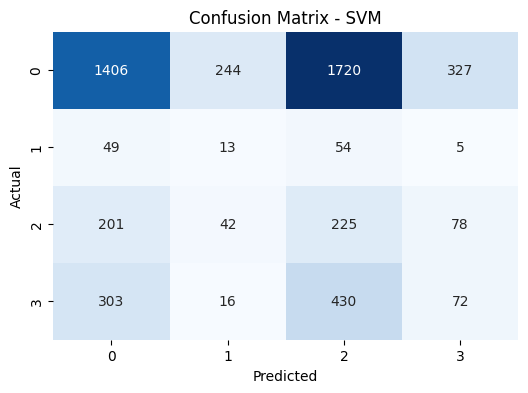

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Logistic Regression
evaluate_model(LogisticRegression(max_iter=500), "Logistic Regression", X_train, X_test, y_train, y_test)

# Random Forest
evaluate_model(RandomForestClassifier(n_estimators=200,max_depth=None, random_state=42,n_jobs=-1), "Random Forest", X_train, X_test, y_train, y_test)

# SVM
evaluate_model(SVC(
    kernel="linear",   # you can try "rbf" or "poly"
    C=0.1,             # regularization strength
    max_iter=10000     # safety cap so it doesn't run forever
), "SVM", X_train, X_test, y_train, y_test)


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

def eval_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    return accuracy_score(y_test, yhat), f1_score(y_test, yhat, average='macro')

models = {
  'logreg': LogisticRegression(max_iter=2000, C=1.0),
  'rf': RandomForestClassifier(n_estimators=200, max_depth=None, n_jobs=-1, random_state=42)
}

# Example: train on A, test on C
acc_f1 = {}
for name, m in models.items():
    acc_f1[name] = eval_model(m, X_train, y_train, X_test, y_test)
print(acc_f1)
acc_diff_dataset = {}
for name, m in models.items():
    acc_diff_dataset[name] = eval_model(m, X_train, y_train, X_test_diff, y_test_diff)
print(acc_diff_dataset)

c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logreg': (0.7297974927675989, 0.38364616839945753), 'rf': (0.8761812921890068, 0.683013010002574)}


c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


{'logreg': (0.019964122446617674, 0.009786678769998865), 'rf': (0.1578612348822406, 0.06816932380428807)}


c:\Users\adith\miniconda3\envs\emerson\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


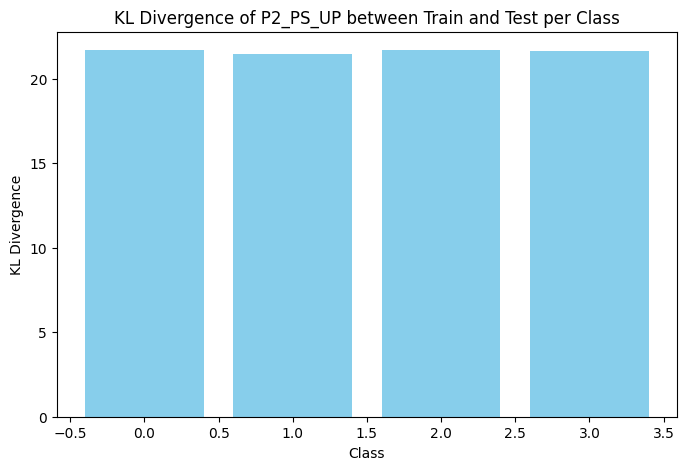

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Load your CSVs
train = pd.read_csv(r'G:\GlitchDetect\supervised_learning_non_seq\generated_data\2000_flow_1hr_25_11hr_50_with_faults.csv')
test = pd.read_csv(r'G:\GlitchDetect\supervised_learning_non_seq\generated_data\generated_with_faults.csv')

sensor = "P2_PS_UP"
label = "fault_label"  # change if your class column has another name

# Define bins for histogram (common bins for both datasets)
bins = 50
hist_range = (min(train[sensor].min(), test[sensor].min()), 
              max(train[sensor].max(), test[sensor].max()))

kl_divs = {}

# Loop over each class
for cls in sorted(train[label].unique()):
    train_vals = train[train[label] == cls][sensor].dropna()
    test_vals = test[test[label] == cls][sensor].dropna()
    
    # Histogram → probability distribution
    p_train, _ = np.histogram(train_vals, bins=bins, range=hist_range, density=True)
    p_test, _ = np.histogram(test_vals, bins=bins, range=hist_range, density=True)
    
    # Add small epsilon to avoid log(0)
    p_train = p_train + 1e-10
    p_test = p_test + 1e-10
    
    # Normalize
    p_train = p_train / p_train.sum()
    p_test = p_test / p_test.sum()
    
    # KL divergence
    kl_div = entropy(p_train, p_test)
    kl_divs[cls] = kl_div

# Plot
plt.figure(figsize=(8,5))
plt.bar(kl_divs.keys(), kl_divs.values(), color="skyblue")
plt.xlabel("Class")
plt.ylabel("KL Divergence")
plt.title(f"KL Divergence of {sensor} between Train and Test per Class")
plt.show()
